# HW 5

In [2]:
library(faraway)
library(leaps)
library(pls)
library(MASS)
library(Metrics)
library(lars)


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings


Loaded lars 1.2




## Part A (Maximum 3 pages 40 points). 

Use the prostate data with lpsa as
the response and the other variables as predictors. Implement the following
variable selection methods to determine the ‘best’ model:\
1.AIC (20 points)\
2.Adjusted R2(20 points)\
Comment on the models selected (similarities and/or differences). Compare
the fits of the full model and those selected by the methods above.

In [4]:
# Initialize data
data(prostate)
head(prostate)
summary(prostate)
dim(prostate)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,-0.5798185,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
2,-0.9942523,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
3,-0.5108256,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
4,-1.2039728,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
5,0.7514161,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156
6,-1.0498221,3.2288,50,-1.386294,0,-1.38629,6,0,0.76547


     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.653   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.878   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :6.108   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1786   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa        
 Min.   :-0.430

[1] 97  9

### AIC

In [131]:
# AIC-stepwise search
AIC_S <- lm (lpsa ~ . , data=prostate)
step(AIC_S)

Start:  AIC=-58.32
lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + 
    pgg45

          Df Sum of Sq    RSS     AIC
- gleason  1    0.0412 44.204 -60.231
- pgg45    1    0.5258 44.689 -59.174
- lcp      1    0.6740 44.837 -58.853
<none>                 44.163 -58.322
- age      1    1.5503 45.713 -56.975
- lbph     1    1.6835 45.847 -56.693
- lweight  1    3.5861 47.749 -52.749
- svi      1    4.9355 49.099 -50.046
- lcavol   1   22.3721 66.535 -20.567

Step:  AIC=-60.23
lpsa ~ lcavol + lweight + age + lbph + svi + lcp + pgg45

          Df Sum of Sq    RSS     AIC
- lcp      1    0.6623 44.867 -60.789
<none>                 44.204 -60.231
- pgg45    1    1.1920 45.396 -59.650
- age      1    1.5166 45.721 -58.959
- lbph     1    1.7053 45.910 -58.560
- lweight  1    3.5462 47.750 -54.746
- svi      1    4.8984 49.103 -52.037
- lcavol   1   23.5039 67.708 -20.872

Step:  AIC=-60.79
lpsa ~ lcavol + lweight + age + lbph + svi + pgg45

          Df Sum of Sq    RSS     AIC



Call:
lm(formula = lpsa ~ lcavol + lweight + age + lbph + svi, data = prostate)

Coefficients:
(Intercept)       lcavol      lweight          age         lbph          svi  
    0.95100      0.56561      0.42369     -0.01489      0.11184      0.72095  


This method eliminates $gleason$, $lcp$ and $pgg45$ and the returns the final model with $lcavol$, $lweight$, $age$, $lbph$ and $svi$.

In [132]:
# AIC-exhaustive search
AIC_e <- regsubsets(lpsa~.,data=prostate)
s = summary(AIC_e)
s

Subset selection object
Call: regsubsets.formula(lpsa ~ ., data = prostate)
8 Variables  (and intercept)
        Forced in Forced out
lcavol      FALSE      FALSE
lweight     FALSE      FALSE
age         FALSE      FALSE
lbph        FALSE      FALSE
svi         FALSE      FALSE
lcp         FALSE      FALSE
gleason     FALSE      FALSE
pgg45       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         lcavol lweight age lbph svi lcp gleason pgg45
1  ( 1 ) "*"    " "     " " " "  " " " " " "     " "  
2  ( 1 ) "*"    "*"     " " " "  " " " " " "     " "  
3  ( 1 ) "*"    "*"     " " " "  "*" " " " "     " "  
4  ( 1 ) "*"    "*"     " " "*"  "*" " " " "     " "  
5  ( 1 ) "*"    "*"     "*" "*"  "*" " " " "     " "  
6  ( 1 ) "*"    "*"     "*" "*"  "*" " " " "     "*"  
7  ( 1 ) "*"    "*"     "*" "*"  "*" "*" " "     "*"  
8  ( 1 ) "*"    "*"     "*" "*"  "*" "*" "*"     "*"  

In [133]:
aic = 97*log(s$rss/97) + (2:9)*2
which.min(aic)

[1] 5

This method also eliminates $gleason$, $lcp$ and $pgg45$ and the returns the final model with $lcavol$, $lweight$, $age$, $lbph$ and $svi$.

### Adjusted R_square

In [134]:
which.max(s$adjr2)

[1] 7

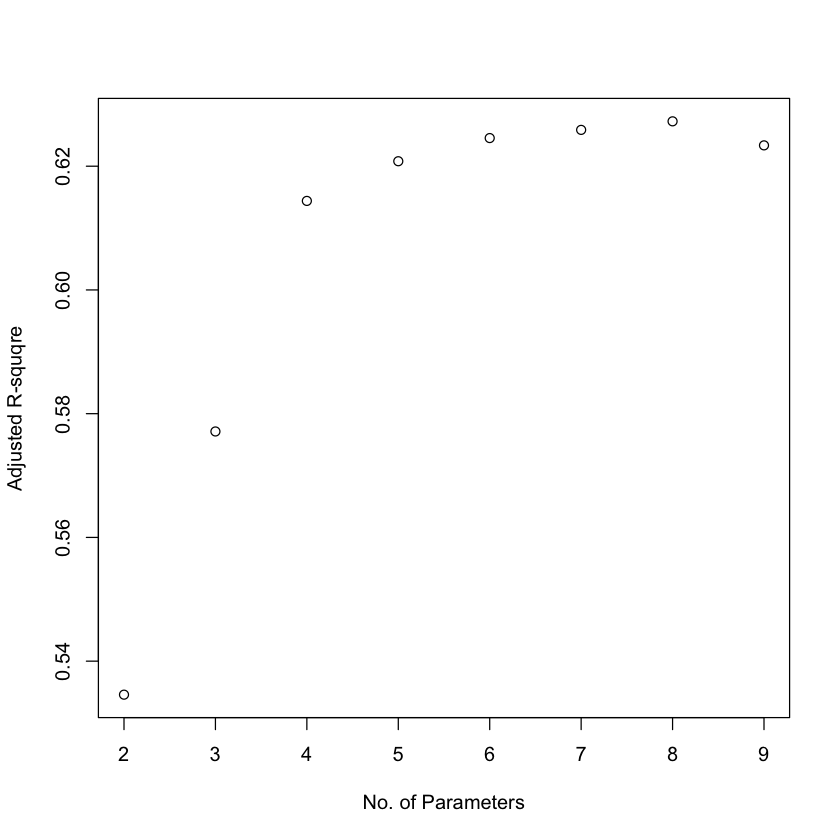

In [135]:
plot (2:9, s$adjr2, xlab="No. of Parameters",ylab="Adjusted R-squqre")

For adjusted $R^2$, if we pick the largest $R_a^2$, 8 parameters are the best, i.e.: $gleason$ is removed.

### Compare the fits of the full model and those selected by the methods above

In [136]:
FULLmod = lm (lpsa ~ . , data=prostate)
AICmod = lm(lpsa ~ lcavol + lweight + age + lbph + svi, data=prostate)
ARSmod = lm(lpsa ~ lcavol + lweight + age + lbph + svi + lcp + pgg45, data=prostate)
summary(FULLmod)
summary(AICmod)
summary(ARSmod)


Call:
lm(formula = lpsa ~ ., data = prostate)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7331 -0.3713 -0.0170  0.4141  1.6381 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.669337   1.296387   0.516  0.60693    
lcavol       0.587022   0.087920   6.677 2.11e-09 ***
lweight      0.454467   0.170012   2.673  0.00896 ** 
age         -0.019637   0.011173  -1.758  0.08229 .  
lbph         0.107054   0.058449   1.832  0.07040 .  
svi          0.766157   0.244309   3.136  0.00233 ** 
lcp         -0.105474   0.091013  -1.159  0.24964    
gleason      0.045142   0.157465   0.287  0.77503    
pgg45        0.004525   0.004421   1.024  0.30886    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7084 on 88 degrees of freedom
Multiple R-squared:  0.6548,	Adjusted R-squared:  0.6234 
F-statistic: 20.86 on 8 and 88 DF,  p-value: < 2.2e-16



Call:
lm(formula = lpsa ~ lcavol + lweight + age + lbph + svi, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.83505 -0.39396  0.00414  0.46336  1.57888 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.95100    0.83175   1.143 0.255882    
lcavol       0.56561    0.07459   7.583 2.77e-11 ***
lweight      0.42369    0.16687   2.539 0.012814 *  
age         -0.01489    0.01075  -1.385 0.169528    
lbph         0.11184    0.05805   1.927 0.057160 .  
svi          0.72095    0.20902   3.449 0.000854 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7073 on 91 degrees of freedom
Multiple R-squared:  0.6441,	Adjusted R-squared:  0.6245 
F-statistic: 32.94 on 5 and 91 DF,  p-value: < 2.2e-16



Call:
lm(formula = lpsa ~ lcavol + lweight + age + lbph + svi + lcp + 
    pgg45, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73117 -0.38137 -0.01728  0.43364  1.63513 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.953926   0.829439   1.150  0.25319    
lcavol       0.591615   0.086001   6.879 8.07e-10 ***
lweight      0.448292   0.167771   2.672  0.00897 ** 
age         -0.019336   0.011066  -1.747  0.08402 .  
lbph         0.107671   0.058108   1.853  0.06720 .  
svi          0.757734   0.241282   3.140  0.00229 ** 
lcp         -0.104482   0.090478  -1.155  0.25127    
pgg45        0.005318   0.003433   1.549  0.12488    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7048 on 89 degrees of freedom
Multiple R-squared:  0.6544,	Adjusted R-squared:  0.6273 
F-statistic: 24.08 on 7 and 89 DF,  p-value: < 2.2e-16


Compared with original model, we can see that either the model using AIC method or the model using adjusted R2 has a better fit, because the p-values of their predictors drop significantly, which indicates their significance is increasing.

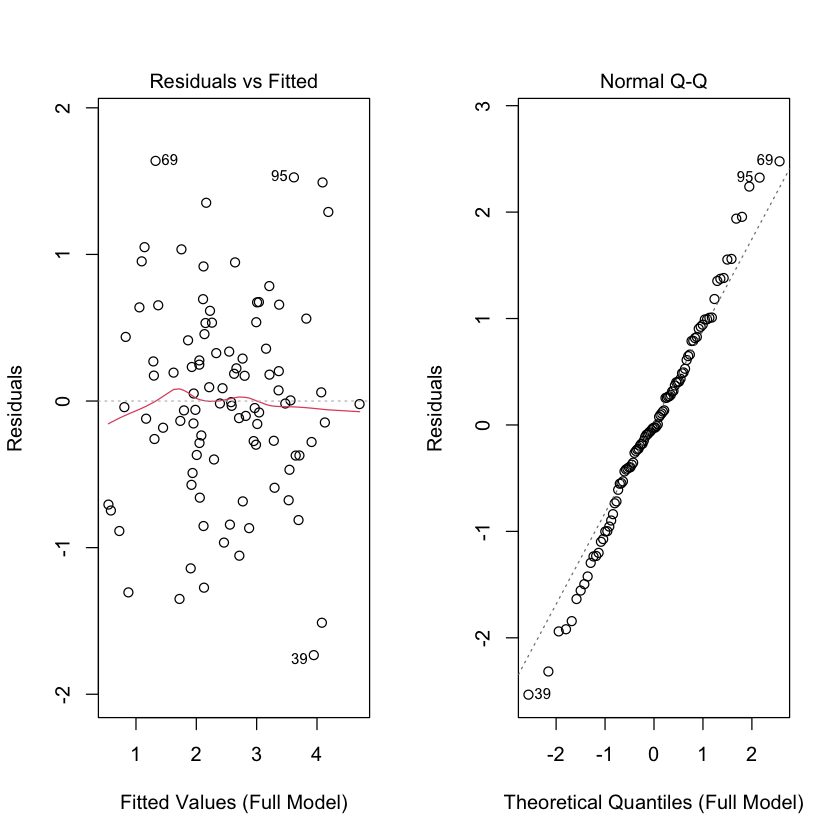

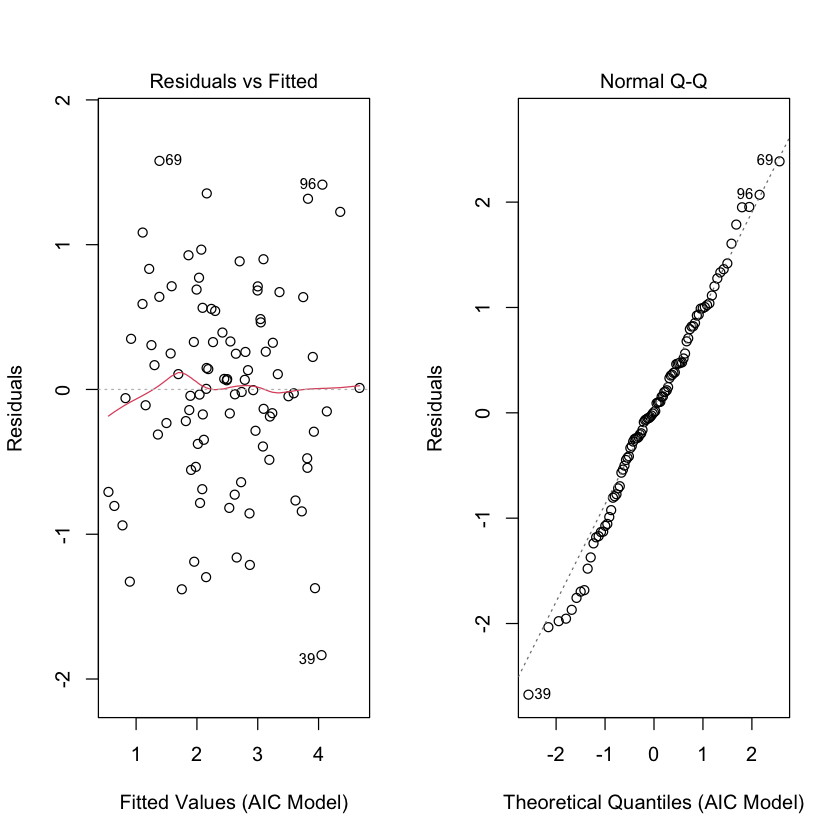

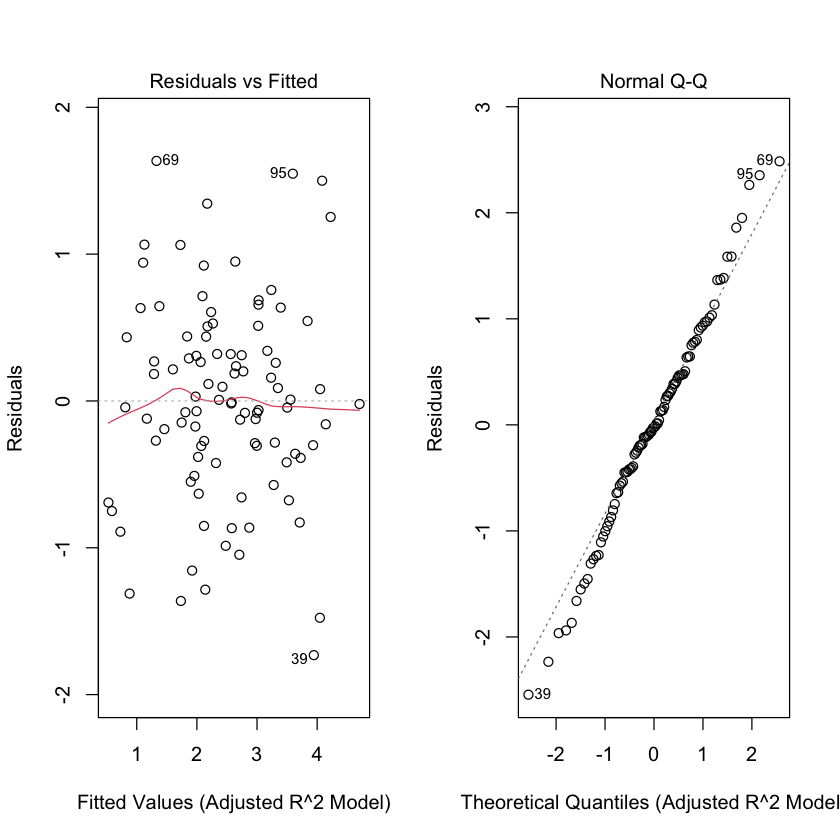

In [137]:
# define plotting functions
plot_residuals <- function(model, model_name){
  par(mfrow=c(1,2))
  # Residuals vs Fitted
  par(col.lab="white")
  plot(model, which=1)
  par(col.lab="black")
  title(xlab=paste("Fitted Values (", model_name, ")", sep=""), ylab="Residuals")
  # Q-Q Plot
  par(col.lab="white")
  plot(model, which=2)
  par(col.lab="black")
  title(xlab=paste("Theoretical Quantiles (", model_name, ")", sep=""), ylab="Residuals")
}
plot_residuals(FULLmod, "Full Model")
plot_residuals(AICmod, "AIC Model")
plot_residuals(ARSmod, "Adjusted R^2 Model")

## Part B (Maximum 4 pages 60 points+ 10 bonus points ). 

(Based on Problem 5, page 181 in Faraway) The data set of gasoline in the package pls has infrared spectra on 60 samples of gasoline and corresponding octane numbers.\
Analyze this data with the three requirements below. The R code illustrated in the lecture would be helpful.\
    In carrying this out, start by separating out every fifth value for the test
data set and utilize the rest as training data. Specifically, the test data cor-
responds to observation indices of 1, 6, 11, ..., 56. You should use training
data to fit, select variable with AIC or use CV/GCV to pick the regulariza-
tion parameters. Only use the test dataset to check the prediction perfor-
mance of the fitted model (RMSE).\
    Besides, use random seed 123 in your code to make your results reproducible.

•Carry out the following regressions of octane as dependent variable and the predictors being the first 40 NIR bands.\
– Linear regression with all predictors\
– Linear regression with variables selected using AIC\
– Ridge regression - using GCV to pick the regularization parameter $\lambda$\
– Lasso regression - using CV to pick the regularization parameter

•Make a report on the various aspects of each of these regression models and provide informative summaries/plots describing the results, similar to what was done in class. (40 points)

•The prediction RMSE on the train and test data sets should be computed. Provide a discussion of the results.(20 points)

•Please use principle component regression (PCR) to fit the same dataset. Standardize all predictors firstly. Using CV to pick the number of components in your model. Please compute the RMSE on the train and test data. Compare it to the results from above methods and comment it. (10 bonus points)

In [138]:
data(gasoline, package="pls")

gasdata = data.frame(cbind(gasoline$octane, gasoline$NIR[,c(1:40)]))
names=paste('NIR',as.character(1:40),sep='')
names(gasdata)=c('octane',names)

temp = seq(1,56,5)
gasdata_tr = gasdata[-temp,]
gasdata_te = gasdata[temp,]
rm(names,temp)

set.seed(123)

In [139]:
head(gasdata)

,octane,NIR1,NIR2,NIR3,NIR4,NIR5,NIR6,NIR7,NIR8,NIR9,⋯,NIR31,NIR32,NIR33,NIR34,NIR35,NIR36,NIR37,NIR38,NIR39,NIR40
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,85.30,-0.050193,-0.045903,-0.042187,-0.037177,-0.033348,-0.031207,-0.030036,-0.031298,-0.034217,⋯,-0.071454,-0.071469,-0.071631,-0.070886,-0.071010,-0.070609,-0.070464,-0.070433,-0.069957,-0.070208
2,85.25,-0.044227,-0.039602,-0.035673,-0.030911,-0.026675,-0.023871,-0.022571,-0.025410,-0.028960,⋯,-0.068434,-0.067953,-0.067061,-0.066073,-0.065564,-0.065335,-0.064051,-0.063666,-0.062513,-0.061955
3,88.45,-0.046867,-0.041260,-0.036979,-0.031458,-0.026520,-0.023346,-0.021392,-0.024993,-0.029309,⋯,-0.070639,-0.070578,-0.070137,-0.069803,-0.069738,-0.070031,-0.069496,-0.069789,-0.069002,-0.069288
4,83.40,-0.046705,-0.042240,-0.038561,-0.034513,-0.030206,-0.027680,-0.026042,-0.028280,-0.030920,⋯,-0.069995,-0.070687,-0.070725,-0.070661,-0.071043,-0.071324,-0.070894,-0.071157,-0.070798,-0.071120
5,87.90,-0.050859,-0.045145,-0.041025,-0.036357,-0.032747,-0.031498,-0.031415,-0.034611,-0.037781,⋯,-0.072681,-0.072639,-0.072274,-0.071837,-0.071892,-0.071883,-0.071469,-0.071713,-0.071145,-0.071399
6,85.50,-0.048094,-0.042739,-0.038812,-0.034017,-0.030143,-0.027690,-0.026387,-0.028811,-0.031481,⋯,-0.069971,-0.070023,-0.069614,-0.069294,-0.069277,-0.069443,-0.068892,-0.069112,-0.068510,-0.068906


### Carry out Regressions of octane as dependent variable and the predictors being the first 40 NIR bands.

#### Linear regression with all predictors

In [140]:
LR <-lm(octane~., data =gasdata_tr)

#### Linear regression with variables selected using AIC

In [141]:
AICSelect <-step(LR,direction = 'both')

Start:  AIC=-72.6
octane ~ NIR1 + NIR2 + NIR3 + NIR4 + NIR5 + NIR6 + NIR7 + NIR8 + 
    NIR9 + NIR10 + NIR11 + NIR12 + NIR13 + NIR14 + NIR15 + NIR16 + 
    NIR17 + NIR18 + NIR19 + NIR20 + NIR21 + NIR22 + NIR23 + NIR24 + 
    NIR25 + NIR26 + NIR27 + NIR28 + NIR29 + NIR30 + NIR31 + NIR32 + 
    NIR33 + NIR34 + NIR35 + NIR36 + NIR37 + NIR38 + NIR39 + NIR40

        Df Sum of Sq    RSS     AIC
- NIR3   1  0.000020 1.9161 -74.604
- NIR6   1  0.000085 1.9161 -74.603
- NIR24  1  0.000263 1.9163 -74.598
- NIR1   1  0.000979 1.9170 -74.580
- NIR7   1  0.000993 1.9170 -74.580
- NIR25  1  0.001133 1.9172 -74.576
- NIR8   1  0.001254 1.9173 -74.573
- NIR20  1  0.003336 1.9194 -74.521
- NIR5   1  0.004734 1.9208 -74.486
- NIR16  1  0.006179 1.9222 -74.450
- NIR32  1  0.013780 1.9298 -74.261
- NIR38  1  0.014097 1.9302 -74.253
- NIR26  1  0.016268 1.9323 -74.199
- NIR13  1  0.016454 1.9325 -74.194
- NIR33  1  0.023278 1.9393 -74.025
- NIR31  1  0.023896 1.9400 -74.010
- NIR9   1  0.024552 1.9406 -73

In [142]:
AICmod<-lm(octane ~ NIR2 + NIR4 + NIR10 + NIR12 + NIR14 + NIR15 + NIR17 + 
    NIR18 + NIR19 + NIR21 + NIR23 + NIR27 + NIR28 + NIR29 + NIR30 + 
    NIR31 + NIR33 + NIR34 + NIR36 + NIR38 + NIR39 + NIR40, data = gasdata_tr)

#### Ridge regression- using GCV to pick the regularization parameter $\lambda$

[1] 100  41

0.074747475 
         38

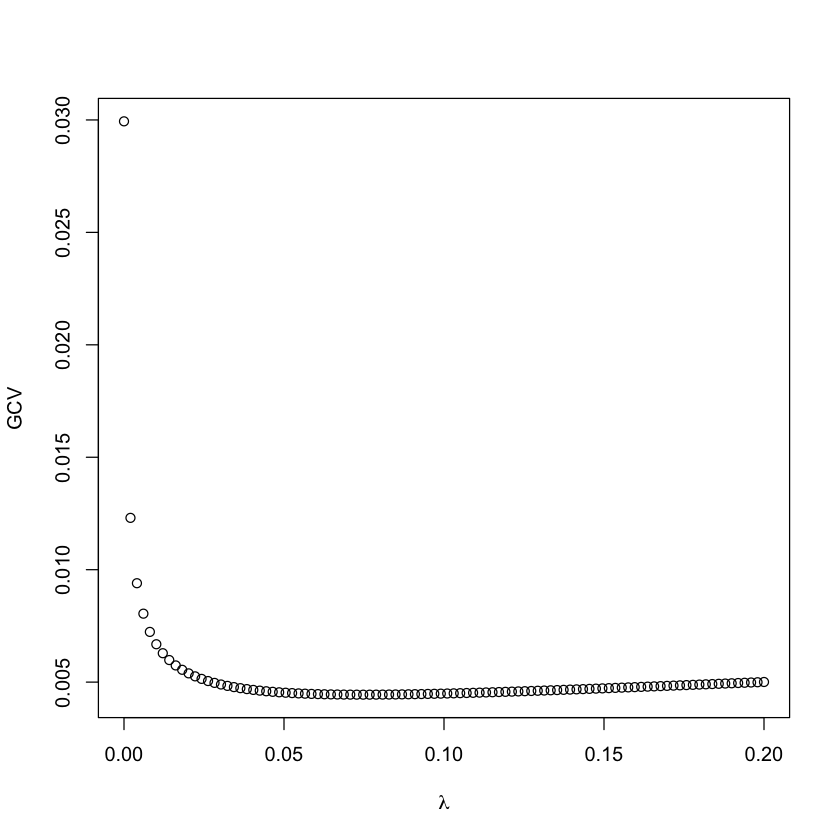

In [143]:
lambda.set=seq(0, 0.2, len=100)
RR<-lm.ridge(octane ~ ., gasdata_tr, lambda = lambda.set)

# GCV
dim(coef(RR))
plot(x=lambda.set, y=RR$GCV, xlab = expression(lambda),ylab = "GCV")
which.min(RR$GCV)

In [144]:
RR_optimal = lm.ridge(octane ~ ., data=gasdata_tr, lambda = 0.074747475)

#### Lasso regression - using CV to pick the regularization parameter

[1] 0.05050505

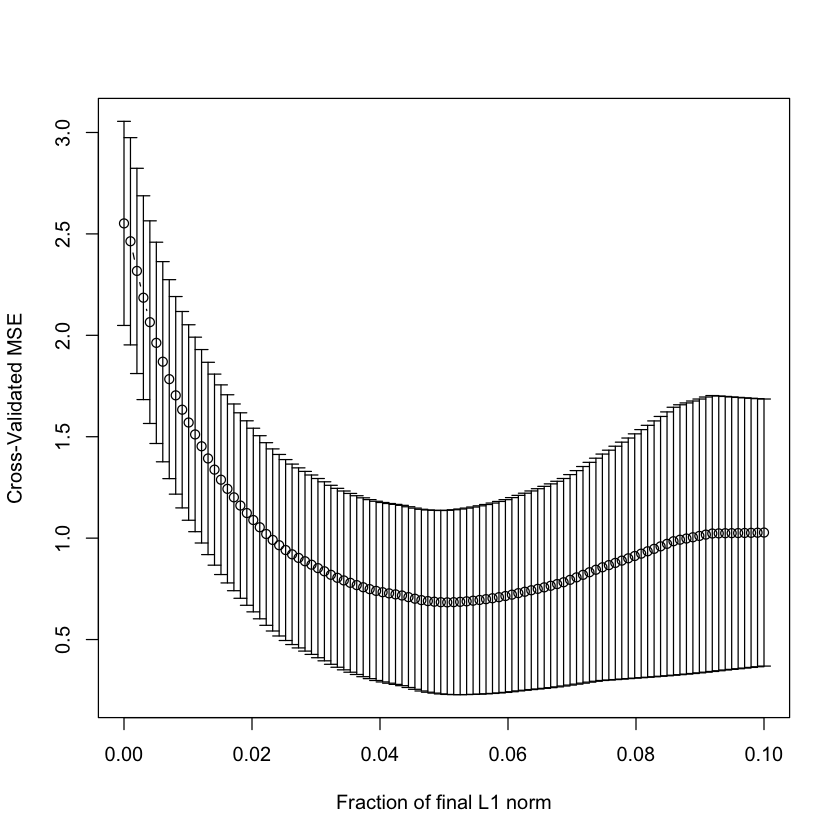

In [145]:
trainy <- as.matrix(gasdata_tr$octane)
trainx <- as.matrix(gasdata_tr[,-1])
modlasso <- lars(trainx,trainy)

# CV
set.seed(123)
modlasso.cv <- cv.lars(trainx,trainy,K=10,index=seq(from = 0.0, to = 0.1, length =100))
parameter.hat<-modlasso.cv$index[which.min(modlasso.cv$cv)]
parameter.hat

### Make a report on the various aspects of each of these regression models 

#### Linear regression with all predictors

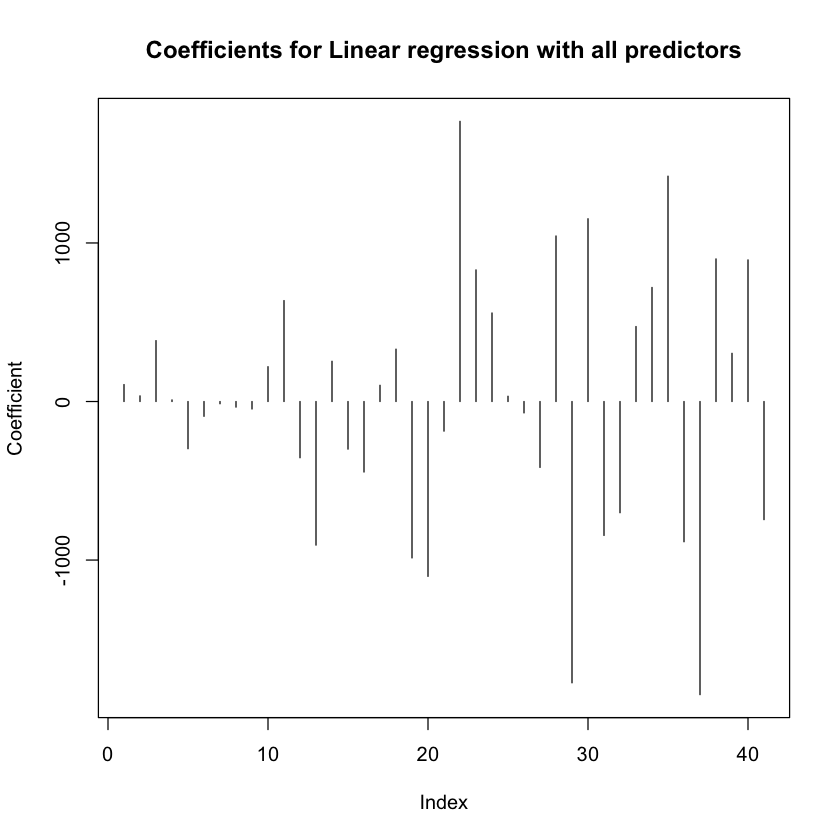

In [146]:
plot(coef(LR),type="h",ylab="Coefficient",main="Coefficients for Linear regression with all predictors")

In [147]:
sum(coef(LR)!=0)

[1] 41

In [148]:
summary(LR)


Call:
lm(formula = octane ~ ., data = gasdata_tr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43436 -0.13133 -0.04657  0.08413  0.44421 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   107.02      20.01   5.349  0.00107 **
NIR1           35.64     595.87   0.060  0.95398   
NIR2          384.21    1005.27   0.382  0.71365   
NIR3           10.17    1197.86   0.008  0.99346   
NIR4         -297.77     894.68  -0.333  0.74901   
NIR5          -93.43     710.43  -0.132  0.89907   
NIR6          -14.22     807.62  -0.018  0.98645   
NIR7          -35.36     587.05  -0.060  0.95365   
NIR8          -47.13     696.38  -0.068  0.94793   
NIR9          219.70     733.58   0.299  0.77326   
NIR10         636.73     640.08   0.995  0.35299   
NIR11        -354.73     850.22  -0.417  0.68901   
NIR12        -905.76     958.04  -0.945  0.37593   
NIR13         253.90    1035.57   0.245  0.81335   
NIR14        -300.37     769.91  -0.390  0.70803  

According to the plot, we observe that there are a lot of parameters very close to "0'. Also, from the summary, even the $p-$value of all the parameters are higher than 0.5. Even though the adjusted R-squared is close to 1, the full linear regression model is not a good fit.

#### Linear regression with variables selected using AIC

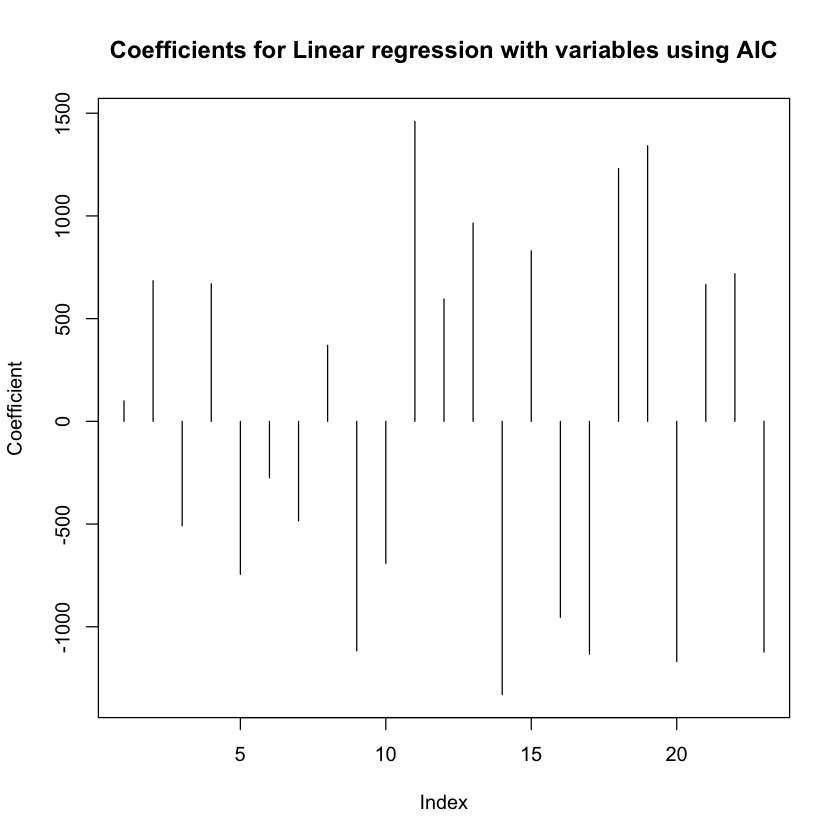

In [149]:
plot(coef(AICmod),type="h",ylab="Coefficient",main="Coefficients for Linear regression with variables using AIC")

In [150]:
summary(coef(AICmod)!=0)

   Mode    TRUE 
logical      23 

In [151]:
summary(AICmod)


Call:
lm(formula = octane ~ NIR2 + NIR4 + NIR10 + NIR12 + NIR14 + NIR15 + 
    NIR17 + NIR18 + NIR19 + NIR21 + NIR23 + NIR27 + NIR28 + NIR29 + 
    NIR30 + NIR31 + NIR33 + NIR34 + NIR36 + NIR38 + NIR39 + NIR40, 
    data = gasdata_tr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42681 -0.14459 -0.05653  0.15007  0.51993 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    99.696      4.179  23.858  < 2e-16 ***
NIR2          684.419    179.710   3.808 0.000809 ***
NIR4         -508.335    104.534  -4.863 5.32e-05 ***
NIR10         669.787    139.875   4.788 6.45e-05 ***
NIR12        -744.776    266.674  -2.793 0.009874 ** 
NIR14        -275.066    252.737  -1.088 0.286823    
NIR15        -484.831    335.843  -1.444 0.161260    
NIR17         370.275    281.261   1.316 0.199955    
NIR18       -1117.209    319.204  -3.500 0.001766 ** 
NIR19        -691.291    356.085  -1.941 0.063567 .  
NIR21        1460.441    456.963   3.196 0.003753 *

The graph for AIC model is similar with the original regression model. However, after using AIC model, there are only 23 parameters left. Also, the adjusted R-squared has improved a lot.

#### Ridge regression - using GCV to pick the regularization parameter $\lambda$

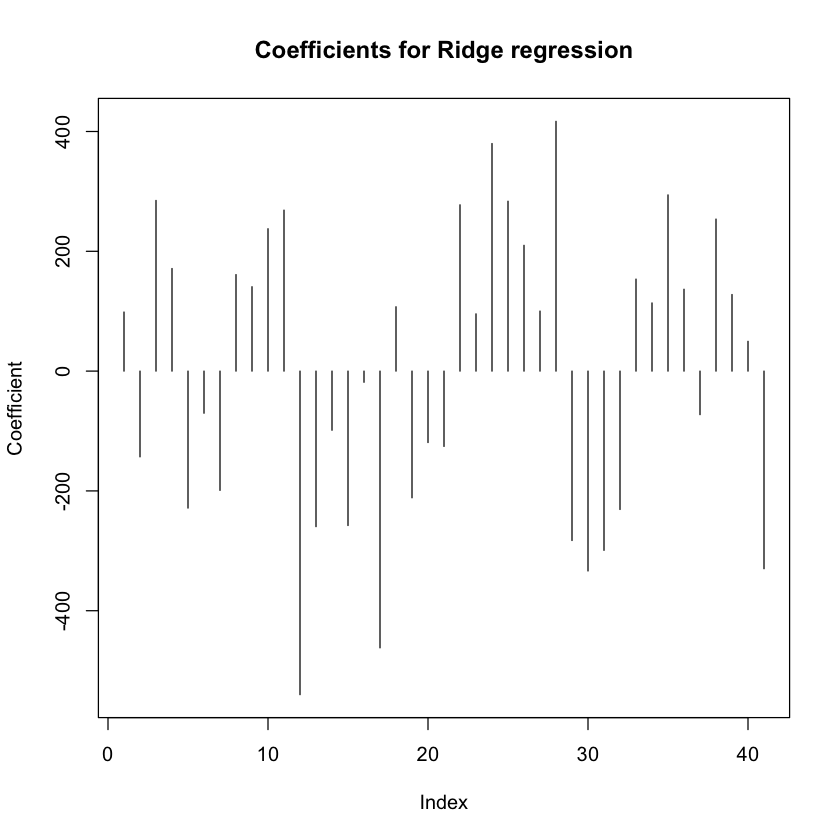

In [152]:
plot(coef(RR_optimal),type="h",ylab="Coefficient",main="Coefficients for Ridge regression")

In [153]:
summary(coef(RR_optimal)!=0)

   Mode    TRUE 
logical      41 

In [154]:
RR_optimal

                 NIR1       NIR2       NIR3       NIR4       NIR5       NIR6 
  98.58698 -143.10836  284.90357  171.25800 -228.62894  -70.29122 -199.08074 
      NIR7       NIR8       NIR9      NIR10      NIR11      NIR12      NIR13 
 161.09810  140.86141  237.64895  268.68767 -540.13344 -259.63872  -98.70864 
     NIR14      NIR15      NIR16      NIR17      NIR18      NIR19      NIR20 
-257.73236  -18.61538 -461.94827  107.39229 -211.46451 -119.23489 -125.71512 
     NIR21      NIR22      NIR23      NIR24      NIR25      NIR26      NIR27 
 277.56453   95.54060  379.88772  283.59327  209.96758  100.19050  416.95347 
     NIR28      NIR29      NIR30      NIR31      NIR32      NIR33      NIR34 
-282.78290 -333.59836 -299.18661 -230.96995  153.56321  113.75876  294.11504 
     NIR35      NIR36      NIR37      NIR38      NIR39      NIR40 
 136.65576  -72.68123  253.75477  127.84409   49.72797 -329.86633 

Compared to the original model, Ridge Regression also selects all predictors. The coefficient plot has very similar trend to the original plot as well. However, it seems that the variance between coefficients is smaller than the original model. We can see that the range in this model (about -500 to 400) is NOT as large as the original model (about -1800 to 1800).

#### Lasso regression - using CV to pick the regularization parameter

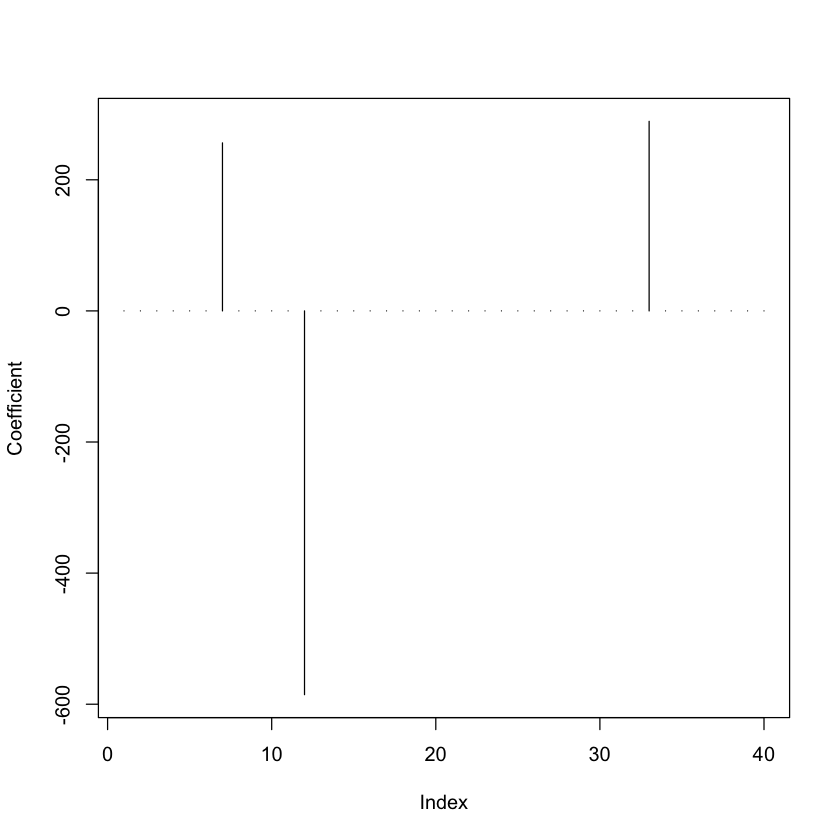

In [155]:
betalasso = coef(modlasso, s=parameter.hat, mode="fraction")
plot(betalasso,type="h",ylab="Coefficient")

In [156]:
sum(betalasso != 0)

[1] 3

In [157]:
betalasso

NIR1      NIR2      NIR3      NIR4      NIR5      NIR6      NIR7      NIR8 
   0.0000    0.0000    0.0000    0.0000    0.0000    0.0000  256.2914    0.0000 
     NIR9     NIR10     NIR11     NIR12     NIR13     NIR14     NIR15     NIR16 
   0.0000    0.0000    0.0000 -585.4328    0.0000    0.0000    0.0000    0.0000 
    NIR17     NIR18     NIR19     NIR20     NIR21     NIR22     NIR23     NIR24 
   0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000 
    NIR25     NIR26     NIR27     NIR28     NIR29     NIR30     NIR31     NIR32 
   0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000 
    NIR33     NIR34     NIR35     NIR36     NIR37     NIR38     NIR39     NIR40 
 289.1801    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000

Using LASSO method drops lots of parameters, there are only three variables left.

### RMSE on the train and test data sets

In [158]:
## Linear Regression
LR_train_octane <- predict.lm(LR, gasdata_tr)
(rmse(gasdata_tr$octane,LR_train_octane))

LR_test_octane <- predict.lm(LR, gasdata_te)
(rmse(gasdata_te$octane,LR_test_octane))

[1] 0.1997947

[1] 0.5104182

The original model is litter overfiting. The training RMSE is relatively very low compared with the testing RMSE.

In [159]:
## AIC
AICmod_train_octane <- predict.lm(AICmod, gasdata_tr)
rmse(gasdata_tr$octane,AICmod_train_octane)

AICmod_test_octane <- predict.lm(AICmod, gasdata_te)
rmse(gasdata_te$octane,AICmod_test_octane)

[1] 0.2190239

[1] 0.6657731

After using AIC method, the RMSE of both the training data and testing data increases. Perhaps ite is becuase that this method drops some parameters.

In [160]:
## Ridge regression
RR_train_octain <- cbind(1,as.matrix(gasdata_tr[,-1])) %*% coef(RR)[38,]
rmse(gasdata_tr$octane,RR_train_octain)

RR_test_octain <- cbind(1,as.matrix(gasdata_te[,-1])) %*% coef(RR)[38,]
rmse(gasdata_te$octane,RR_test_octain)

[1] 0.2831987

[1] 0.490496

Compared with the original model, the training RMSE increases wheras the testing RMSE decreases slightly, which means the Ridge regression somehow improves the accuracy.

In [161]:
## Lasso Regression
trainx <- as.matrix(gasdata_tr[,-1])
predlars <- predict(modlasso,trainx,s=parameter.hat,mode="fraction")
rmse(gasdata_tr$octane, predlars$fit)

testx <- as.matrix(gasdata_te[,-1])
predlars <- predict(modlasso,testx,s=parameter.hat,mode="fraction")
rmse(gasdata_te$octane, predlars$fit)

[1] 0.8260733

[1] 0.6465394

No matter the training RMSE or the testing RMSE, both are very high. The main reason I think is giving up too many predictors.

### use principle component regression (PCR) to fit the same dataset

In [162]:
# PCA
prgasc <- prcomp(gasdata_tr[,-1],scale = TRUE)

#rotation matrix
dim(prgasc$rot)

[1] 40 40

In [163]:
# PCA component z
dim(prgasc$x)

[1] 48 40

In [164]:
summary(prgasc)

Importance of components:
                          PC1    PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     6.2232 0.7457 0.66232 0.3796 0.17238 0.15685 0.12245
Proportion of Variance 0.9682 0.0139 0.01097 0.0036 0.00074 0.00062 0.00037
Cumulative Proportion  0.9682 0.9821 0.99309 0.9967 0.99743 0.99805 0.99842
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.11848 0.09801 0.08051 0.07129 0.06361 0.05898 0.05799
Proportion of Variance 0.00035 0.00024 0.00016 0.00013 0.00010 0.00009 0.00008
Cumulative Proportion  0.99877 0.99901 0.99917 0.99930 0.99940 0.99949 0.99957
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.04826 0.04498 0.04212 0.03826 0.03534 0.03295 0.03152
Proportion of Variance 0.00006 0.00005 0.00004 0.00004 0.00003 0.00003 0.00002
Cumulative Proportion  0.99963 0.99968 0.99973 0.99976 0.99980 0.99982 0.99985
                          PC22    PC23

In [165]:
# Loadings in the first component of PCA
round(prgasc$rot[,1],6)

NIR1      NIR2      NIR3      NIR4      NIR5      NIR6      NIR7      NIR8 
-0.159590 -0.159722 -0.159411 -0.157364 -0.156042 -0.155328 -0.153521 -0.155288 
     NIR9     NIR10     NIR11     NIR12     NIR13     NIR14     NIR15     NIR16 
-0.157081 -0.158338 -0.157261 -0.155558 -0.155887 -0.156213 -0.157617 -0.157844 
    NIR17     NIR18     NIR19     NIR20     NIR21     NIR22     NIR23     NIR24 
-0.158205 -0.158528 -0.159092 -0.159787 -0.159737 -0.159912 -0.159904 -0.159744 
    NIR25     NIR26     NIR27     NIR28     NIR29     NIR30     NIR31     NIR32 
-0.159712 -0.159751 -0.159284 -0.159329 -0.159377 -0.159493 -0.159337 -0.159276 
    NIR33     NIR34     NIR35     NIR36     NIR37     NIR38     NIR39     NIR40 
-0.159074 -0.158910 -0.158673 -0.157923 -0.157742 -0.157089 -0.156490 -0.155781

#### PCR with CV -  before normalizing the variables

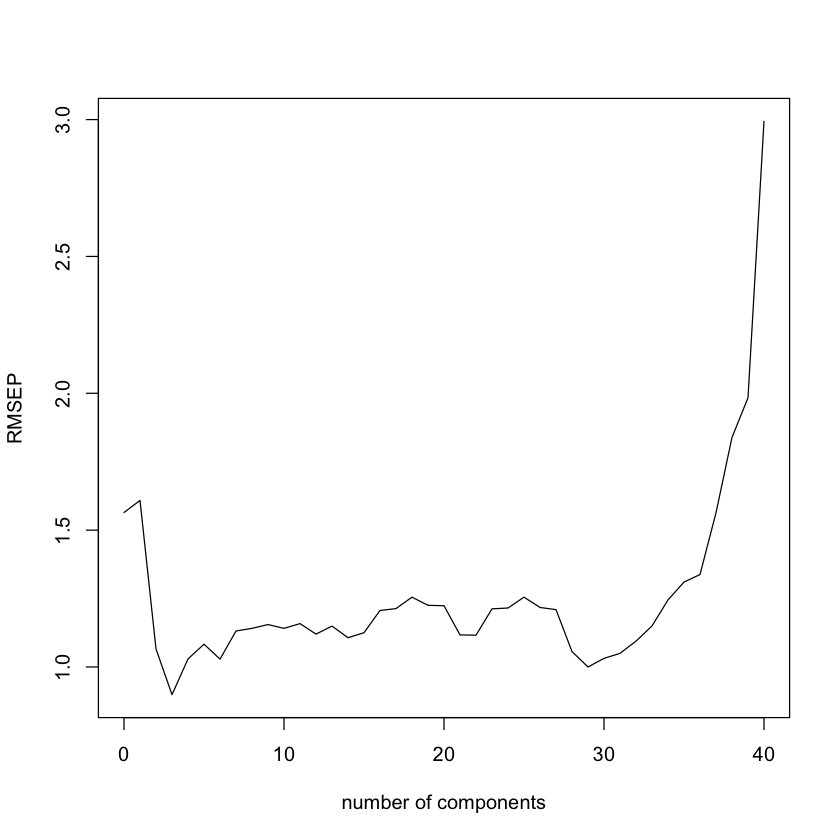

In [166]:
set.seed(123)
pcrmod_before <- pcr(octane ~ ., data=gasdata_tr,validation="CV", ncomp=40)
pcrCV_before <- RMSEP(pcrmod_before, estimate="CV")
plot(pcrCV_before,main="")

In [167]:
which.min(pcrCV_before$val)

[1] 4

In [168]:
ypred <- predict(pcrmod_before, gasdata_tr, ncomp=4)
rmse(gasdata_tr$octane, ypred)

ypred <- predict(pcrmod_before, gasdata_te, ncomp=4)
rmse(gasdata_te$octane, ypred)

[1] 0.6518161

[1] 0.4215554

Using PCR with CV, even though the traning RMSE is relatively high, but we get the best testing RMSE. Copared to other models, I think theis model is the best fit we get.

#### PCR with CV - after normalizing the variables

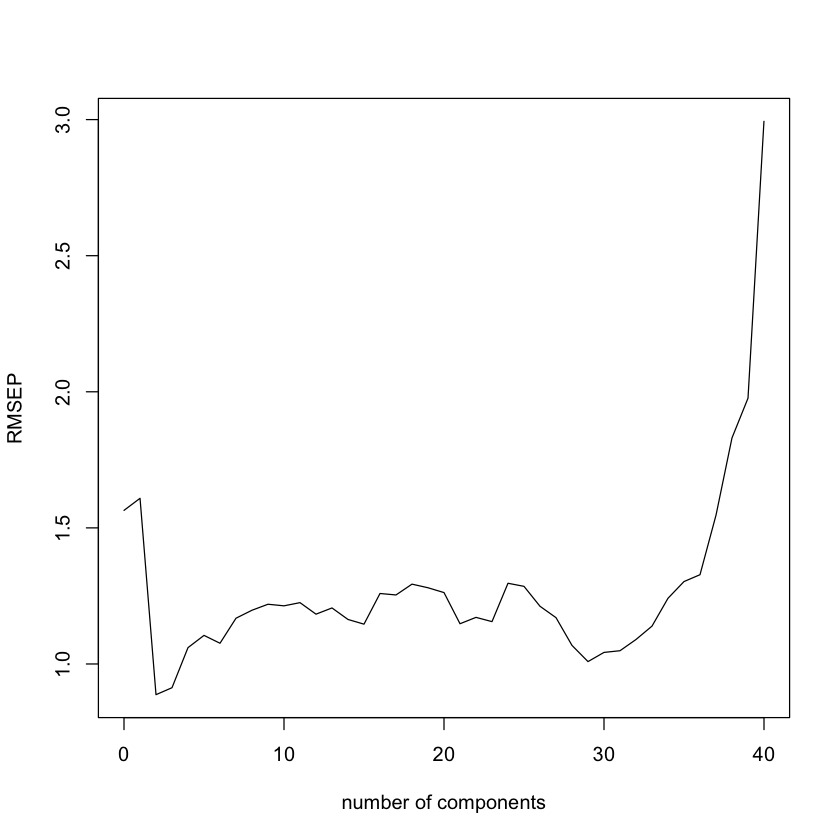

In [169]:
set.seed(123)
# set scale = true to normalize all the variables
pcrmod_after <- pcr(octane ~ ., data=gasdata_tr, scale=TRUE, validation="CV", ncomp=40)
pcrCV_after <- RMSEP(pcrmod_after, estimate="CV")
plot(pcrCV_after,main="")

In [170]:
which.min(pcrCV_after$val)

[1] 3

In [171]:
ypred <- predict(pcrmod_after, gasdata_tr, ncomp=3)
rmse(gasdata_tr$octane, ypred)

ypred <- predict(pcrmod_after, gasdata_te, ncomp=3)
rmse(gasdata_te$octane, ypred)

[1] 0.8085216

[1] 0.456549

It is surprising that after normalizing the variables, both the training RMSE and the testing RMSE has increased compared with before normalizing variables. And the training RMSE is the highest among all the models we have. But the tessting RMSE has a relatively better performance, this may indicate its generality.